In [1]:
#Exploratory Analysis 

In [2]:
import pandas as pd
import numpy as np 

In [3]:
df=pd.read_csv(r"C:\Users\abhin\Downloads\archive(1)\HousingData.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT' ]

X = df[columns].values
y = df['MEDV'].values

In [8]:
 #Normalise this dataset
# Each feature must have 0 mean,unit variance 

import numpy as np 
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
print(u.shape,std.shape)


(13,) (13,)


In [9]:
#Normalise the data
X=(X-u)/std

In [10]:
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,-0.144217,0.413672,NaN,0.140214,-0.982843,-0.666608,-1.459000,0.441052,NaN
1,NaN,NaN,NaN,NaN,-0.740262,0.194274,NaN,0.557160,-0.867883,-0.987329,-0.303094,0.441052,NaN
2,NaN,NaN,NaN,NaN,-0.740262,1.282714,NaN,0.557160,-0.867883,-0.987329,-0.303094,0.396427,NaN
3,NaN,NaN,NaN,NaN,-0.835284,1.016303,NaN,1.077737,-0.752922,-1.106115,0.113032,0.416163,NaN
4,NaN,NaN,NaN,NaN,-0.835284,1.228577,NaN,1.077737,-0.752922,-1.106115,0.113032,0.441052,NaN


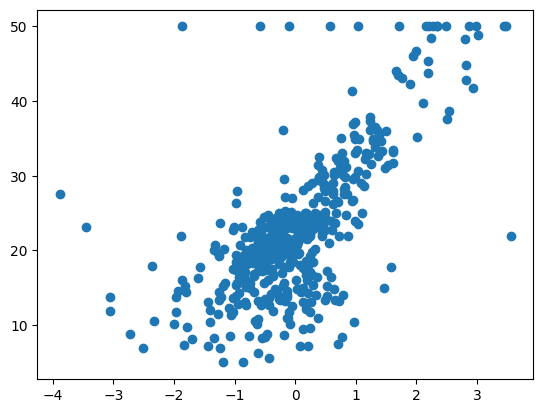

In [11]:
#Plot Y vs any features
import matplotlib.pyplot as plt
plt.scatter(X[:,5],y)
plt.show()

In [12]:
#Section-2 Linear Regression on Multiple Features
X.shape,y.shape


((506, 13), (506,))

In [13]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape)

(506, 14)


In [14]:
import numpy as np

# Hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

# Error function (Mean Squared Error)
def error(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    e = np.sum((y - y_) ** 2)
    return e / m

# Gradient function
def gradient(X, y, theta):
    m, n = X.shape
    grad = np.zeros((n,))
    y_ = hypothesis(X, theta)
    
    for j in range(n):
        grad[j] = np.sum((y_ - y) * X[:, j])
    
    return grad / m

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate=0.01, epochs=100):
    m = X.shape[0]
    error_list = []

    for i in range(epochs):
        grad = gradient(X, y, theta)
        theta = theta - learning_rate * grad
        e = error(X, y, theta)
        error_list.append(e)
        
        if i % 10 == 0:  # Print the error every 10 epochs
            print(f'Epoch {i}: Error = {e}')
    
    return theta, error_list

# Example usage
if __name__ == "__main__":
    # Sample data
    X = np.array([[1, 2], [2, 3], [4, 5], [3, 6]])
    y = np.array([3, 5, 7, 8])
    
    # Add a column of ones to X for the intercept term
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize theta
    theta = np.zeros(X.shape[1])
    
    # Perform gradient descent
    theta, error_list = gradient_descent(X, y, theta, learning_rate=0.01, epochs=100)
    
    print("Theta:", theta)
    print("Final Error:", error_list[-1])

 
    

Epoch 0: Error = 19.877521875
Epoch 10: Error = 0.22485423227133308
Epoch 20: Error = 0.18028022038612881
Epoch 30: Error = 0.17610438260843864
Epoch 40: Error = 0.1721811121003417
Epoch 50: Error = 0.1684204714025313
Epoch 60: Error = 0.164815041954676
Epoch 70: Error = 0.16135791322399742
Epoch 80: Error = 0.15804249816587002
Epoch 90: Error = 0.15486251732641843
Theta: [0.30593691 0.52274941 1.01259213]
Final Error: 0.1521113770357542


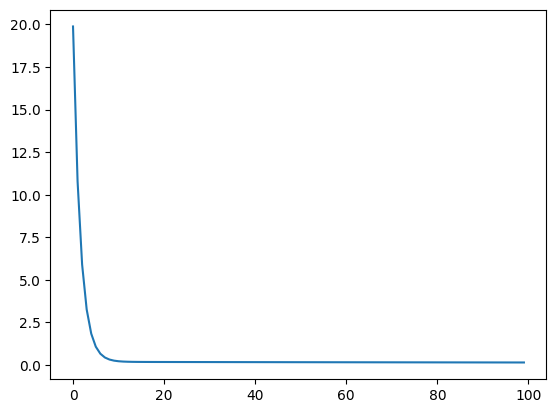

In [15]:
plt.plot(error_list)

In [16]:
# Prediction function
def predict(X, theta):
    predictions = []
    for i in range(X.shape[0]):
        pred = hypothesis(X[i], theta)
        predictions.append(pred)
    return np.array(predictions)

In [25]:
# R^2 Score function
def r2_score(y, y_):
    num = np.sum((y - y_) ** 2)
    denom = np.sum((y - y.mean()) ** 2)
    score = 1 - (num / denom)
    return score * 100

# Example usage
if __name__ == "__main__":
    # Sample data
    X = np.array([[1, 2], [2, 3], [4, 5], [3, 6]])
    y = np.array([3, 5, 7, 8])
    
    # Add a column of ones to X for the intercept term
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Initialize theta
    theta = np.zeros(X.shape[1])
    
    # Perform gradient descent
    theta, error_list = gradient_descent(X, y, theta, learning_rate=0.01, epochs=100)
    
    # Make predictions
    predictions = predict(X, theta)
    
    # Calculate R^2 score
    r2 = r2_score(y, predictions)
    
    print("Predictions:", predictions)
    print("Actual values:", y)
    print("R^2 Score:", r2)

Epoch 0: Error = 19.877521875
Epoch 10: Error = 0.22485423227133308
Epoch 20: Error = 0.18028022038612881
Epoch 30: Error = 0.17610438260843864
Epoch 40: Error = 0.1721811121003417
Epoch 50: Error = 0.1684204714025313
Epoch 60: Error = 0.164815041954676
Epoch 70: Error = 0.16135791322399742
Epoch 80: Error = 0.15804249816587002
Epoch 90: Error = 0.15486251732641843
R^2 Score: 95.87494570750498
